In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch
from scipy.spatial import procrustes
from utils import utils

In [2]:
def evaluate(file_search='image_1', netV = 'v9', vertical=False):
    #file_search = 'image_59'
    r_img_1 = glob.glob('imagesReals_{}/*/{}.png'.format(netV, file_search))[0]
    #r_img_2 = glob.glob('imagesReals_{}/*/{}.png'.format(netV, file_search))[0]
    r_img_2 = glob.glob('imagesFake_{}/*/{}.png'.format(netV, file_search))[0]
    #print(r_img_1)
    img_1 = cv2.imread(r_img_1)
    img_2 = cv2.imread(r_img_2)
    #utils.plotTwoImages(img_1, img_2, ['Real', 'Fake'])
    img_1_part_1, img_1_part_2 = utils.segmentation(img_1, vertical)
    img_2_part_1, img_2_part_2 = utils.segmentation(img_2, vertical)
    #utils.plotTwoImages(img_1_part_1, img_1_part_2, ['Img 1 - Part 1', 'Img 1 - Part 2'])
    #utils.plotTwoImages(img_2_part_1, img_2_part_2, ['Img 2 - Part 1', 'Img  - Part 2'])
    landmarks_img_1 = utils.landmarks(cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY), 25)
    landmarks_img_2 = utils.landmarks(cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY), 25)
    landmarks_img_1_part_1 = utils.landmarks(img_1_part_1, 25)
    landmarks_img_1_part_2 = utils.landmarks(img_1_part_2, 25)
    landmarks_img_2_part_1 = utils.landmarks(img_2_part_1, 25)
    landmarks_img_2_part_2 = utils.landmarks(img_2_part_2, 25)

    #landmarks_img_1_part_1,landmarks_img_2_part_1, _ = procrustes(landmarks_img_1_part_1, landmarks_img_2_part_1)
    #landmarks_img_1_part_2,landmarks_img_2_part_2, _ = procrustes(landmarks_img_1_part_2, landmarks_img_2_part_2)
    return landmarks_img_1_part_1, landmarks_img_2_part_1, landmarks_img_1_part_2, landmarks_img_2_part_2 
    #landmarks_img_1,landmarks_img_2, _ = procrustes(landmarks_img_1, landmarks_img_2)

    #diff_imgs = torch.sqrt(torch.nn.functional.mse_loss(torch.Tensor(landmarks_img_1), 
                                  #torch.Tensor(landmarks_img_2)))

    #diff_imgs_part_1 = torch.sqrt(torch.nn.functional.mse_loss(torch.Tensor(landmarks_img_1_part_1), 
                                 #torch.Tensor(landmarks_img_2_part_1)))

    #diff_imgs_part_2 = torch.sqrt(torch.nn.functional.mse_loss(torch.Tensor(landmarks_img_1_part_2), 
                                 #torch.Tensor(landmarks_img_2_part_2)))


    #utils.plotLandmarks(landmarks_img_1, landmarks_img_2, ['{} - Img - 1'.format(netV), 'Img -2', 'RMSE {}'.format(diff_imgs)])
    #utils.plotLandmarks(landmarks_img_1_part_1, landmarks_img_2_part_1, ['Real - 1 - Part 1', 'Fake -2 - Part 1', 'RMSE {}'.format(diff_imgs_part_1)])
    #plt.savefig('row_part_1_{}.png'.format(netV), bbox_inches='tight',  dpi=300)
    #utils.plotLandmarks(landmarks_img_1_part_2, landmarks_img_2_part_2, ['Real - 1 - Part 2', 'Fake -2 - Part 2', 'RMSE {}'.format(diff_imgs_part_2)])
    #plt.savefig('row_part_2_{}.png'.format(netV), bbox_inches='tight',  dpi=300)

In [3]:
horizontal = [
    True,False,False,True,
    True,False,False,True,
    
    True,True,False,False,
    True,True,False,False,
    
    False,False,False,False,
    False,False,False,False,
    
    False,True,True,True,
    False,True,True,True,
    
    True, True, False, True,
    True, True, False, True,
    
    False, True, True, True,
    False, True, True, True,

    True, True, True, True,
    True, True, True, True,
    
    True, False, True, False,
    True, False, True, False,
    
    True, True, True, True,
    True, True, True, True,
    
    True, False, False, True,
    True, False, False, True,
    
    True, False, False, False,
    True, False, False, False,
    
    False, False, True, False,
    False, False, True, False,
    
    True, True, True, True,
    True, True, True, True,
    
    False, True, False, True,
    False, True, False, True,
    
    False, False, True, False,
    False, False, True, False,
    
    False, True, True, False,
    False, True, True, False,
    
    False, True, False, True,
    False, True, False, True,
    
    False, False, True, False,
    False, False, True, False,
    
    True, True, False, True,
    True, True, False, True,
    
    True, True, True, False,
    True, True, True, False,
    
    False, True, True, False,
    False, True, True, False,
    
    False, True, False, True,
    False, True, False, True,
    
    True, True, True, True,
    True, True, True, True,
    
    True, False, True, False,
    True, False, True, False,
    
    True, False, True, True,
    True, False, True, True,
    
    True, False, False, True,
    True, False, False, True,
    
    False, True, False, True,
    False, True, False, True,
    
    False, False, False, True,
    False, False, False, True,
    
    True, True, True, False,
    True, True, True, False,
    
    False, True, False, True,
    False, True, False, True,
        
    True, True, True, True,
    True, True, True, True,
    
    False, False, True, True,
    False, False, True, True,
    
    False, False, True, False,
    False, False, True, False,
    
    False, True, False, False,
    False, True, False, False,
    
    True, False, False, True,
    True, False, False, True,
    
    False, False, True, False,
    False, False, True, False,
    
    False, False, True, True,
    False, False, True, True,
    
    True, True, True, True,
    True, True, True, True,
    
    True, False, True, False,
    True, False, True, False,
    
    True, True, False, False,
    True, True, False, False,
    
    False, True, False, True,
    False, True, False, True,
    
    True, True, True, False,
    True, True, True, False,
    
    True, False, True, True,
    True, False, True, True,
    
    True, False, True, False,
    True, False, True, False,
    
    True, True, False, True,
    True, True, False, True,
    
    False, False, False, False,
    False, False, False, False,
    
    False, True, True, True,
    False, True, True, True,
    
    True, False, True, False,
    True, False, True, False,
    
    False, True, False, True,
    False, True, False, True,
    
    True, True, False, False,
    True, True, False, False,
    
    False, True, True, False,
    False, True, True, False,
    
    False, False, True,
    False, False, True,
    
    
]

In [4]:
len(horizontal) 

414

In [5]:
len(horizontal) / 8

51.75

In [6]:
falta = ['Tope','Tope','Tope','Tope','Base','Base','Base','Base'] *51
falta = falta + ['Tope','Tope','Tope','Base','Base','Base']

In [7]:
len(falta) 

414

In [8]:
real_part1 = []
real_part2 = []
fake_part1 = []
fake_part2 = []
for i, h, f in zip(range(len(horizontal)), horizontal, falta):
    if not(i in [153, 329, 299]): #234, 299, 234, 153
        landmarks_img_1_part_1, landmarks_img_2_part_1, landmarks_img_1_part_2, landmarks_img_2_part_2 = evaluate('image_{}'.format(i),'v6c', vertical=h)
    real_part1.append(landmarks_img_1_part_1)
    real_part2.append(landmarks_img_1_part_2)
    fake_part1.append(landmarks_img_2_part_1)
    fake_part2.append(landmarks_img_2_part_2)

In [9]:
horizontal = np.logical_not(horizontal)

In [10]:
real_part1 = np.array(real_part1)[horizontal]
real_part2 = np.array(real_part2)[horizontal]
fake_part1 = np.array(fake_part1)[horizontal]
fake_part2 = np.array(fake_part2)[horizontal]
falta = np.array(falta)[horizontal]
indices = np.arange(len(horizontal))[horizontal]

In [11]:
horizontal = np.logical_not(horizontal)

In [12]:
def procrust_land(value, values_lands):
    landks = []
    for v in values_lands:
        l_part_1, l_part_2, _ = procrustes(value, v)
        landks.append(l_part_2)
    return np.array(landks)

In [13]:
real_part1 =  procrust_land(real_part1[0], real_part1)
fake_part1 =  procrust_land(real_part1[0], fake_part1)
real_part2 =  procrust_land(real_part2[0], real_part2)
fake_part2 =  procrust_land(real_part2[0], fake_part2)

In [14]:
from scipy.spatial import distance

In [15]:
def get_neighbors(value, x_pca, cant= 10):
    distances_x = []
    for x in x_pca:
        distances_x.append(distance.euclidean(value, x))
    indicex = np.argsort(np.array(distances_x))
    return np.array(x_pca)[indicex][0:cant], indicex[0:cant]

In [16]:
import numpy as np
from sklearn.decomposition import PCA

In [17]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
X_pca_real_part1 = pca.fit_transform(real_part1.reshape(real_part1.shape[0], -1))
X_pca_fake_part1 = pca.transform(fake_part1.reshape(fake_part1.shape[0], -1))

print(X_pca_real_part1.shape, pca.explained_variance_ratio_)

pca = PCA(n_components=2)
X_pca_real_part2 = pca.fit_transform(real_part2.reshape(real_part2.shape[0], -1))
X_pca_fake_part2 = pca.transform(fake_part2.reshape(fake_part2.shape[0], -1))

print(X_pca_real_part2.shape, pca.explained_variance_ratio_)

(186, 2) [0.66810549 0.22811923]
(186, 2) [0.57233197 0.15534981]


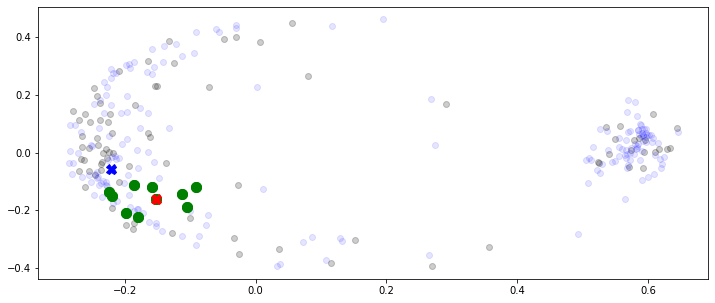

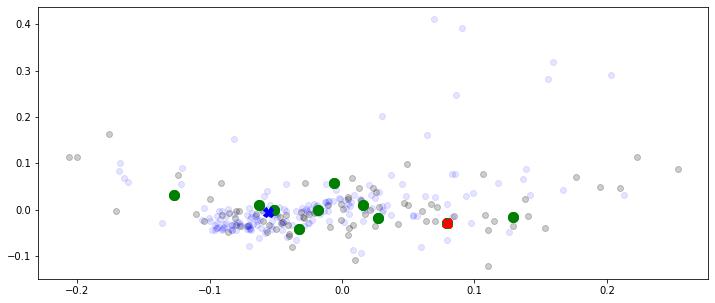

In [18]:
min_neighbors, min_index = get_neighbors(X_pca_real_part1[0], X_pca_real_part1, 20)
plt.figure(figsize=(12,5))
plt.plot(X_pca_real_part1[:, 0], X_pca_real_part1[:, 1], 'ok', alpha=0.1)
plt.plot(X_pca_fake_part1[:, 0], X_pca_fake_part1[:, 1], 'ob', alpha=0.1)
plt.plot(min_neighbors[:, 0], min_neighbors[:, 1], 'og', markersize=10)
plt.plot(X_pca_real_part1[0][0], X_pca_real_part1[0][1], 'Xr', markersize=10)
plt.plot(X_pca_fake_part1[0][0], X_pca_fake_part1[0][1], 'Xb', markersize=10)

min_neighbors = X_pca_real_part2[min_index]#get_neighbors(X_pca_real_part2[0], X_pca_real_part2, 5)
plt.figure(figsize=(12,5))
plt.plot(X_pca_real_part2[:, 0], X_pca_real_part2[:, 1], 'ok', alpha=0.1)
plt.plot(X_pca_fake_part2[:, 0], X_pca_fake_part2[:, 1], 'ob', alpha=0.1)
plt.plot(min_neighbors[:, 0], min_neighbors[:, 1], 'og', markersize=10)
plt.plot(X_pca_real_part2[0][0], X_pca_real_part2[0][1], 'Xr', markersize=10)
plt.plot(X_pca_fake_part2[0][0], X_pca_fake_part2[0][1], 'Xb', markersize=10)

In [19]:
def show_part1(min_neighbors, indx, title):
    plt.figure(figsize=(12,5))
    plt.plot(X_pca_real_part1[:, 0], X_pca_real_part1[:, 1], 'ok', alpha=0.1)
    plt.plot(X_pca_fake_part1[:, 0], X_pca_fake_part1[:, 1], 'ob', alpha=0.1)
    plt.plot(min_neighbors[:, 0], min_neighbors[:, 1], 'og', markersize=10)
    plt.plot(X_pca_fake_part1[indx][0], X_pca_fake_part1[indx][1], 'Xb', alpha=1, markersize=20)
    plt.plot(X_pca_real_part1[indx][0], X_pca_real_part1[indx][1], 'Xr', alpha=1, markersize=20)
    plt.title(title)
    plt.xlim(-0.5, 0.5)
    plt.ylim(-0.5, 0.5)

def show_part2(min_neighbors, indx, title):
    plt.figure(figsize=(12,5))
    plt.plot(X_pca_real_part2[:, 0], X_pca_real_part2[:, 1], 'ok', alpha=0.1)
    plt.plot(X_pca_fake_part2[:, 0], X_pca_fake_part2[:, 1], 'ob', alpha=0.1)
    plt.plot(min_neighbors[:, 0], min_neighbors[:, 1], 'og', markersize=10)
    plt.plot(X_pca_fake_part2[indx][0], X_pca_fake_part2[indx][1], 'Xb', alpha=1, markersize=20)
    plt.plot(X_pca_real_part2[indx][0], X_pca_real_part2[indx][1], 'Xr', alpha=1, markersize=20)
    plt.title(title)
    plt.xlim(-0.5, 0.5)
    plt.ylim(-0.5, 0.5)


In [20]:
def calcDistance(value, x_pca):
    distances_x = []
    for x in x_pca:
        distances_x.append(distance.euclidean(value, x))
    indicex = np.sort(np.array(distances_x))
    print(indicex)
    return indicex[0]

[0.01264407 0.01264407 0.01406113 0.01406113 0.0161659  0.0161659
 0.01701561 0.01701561 0.02222358 0.02222358 0.02408042 0.02408042
 0.02610175 0.02610175 0.0316444  0.0316444  0.03314288 0.03314288
 0.03595934 0.03595934 0.03623033 0.03623033 0.03817673 0.03817673
 0.03850111 0.03850111 0.03864083 0.03864083 0.03933648 0.03933648
 0.04824545 0.04824545 0.05004875 0.05004875 0.0555084  0.0555084
 0.05602478 0.05602478 0.06050481 0.06050481 0.07572474 0.07572474
 0.08412776 0.08412776 0.09416166 0.09416166 0.1169308  0.1169308
 0.18431257 0.18431257]
0.012644070384531875


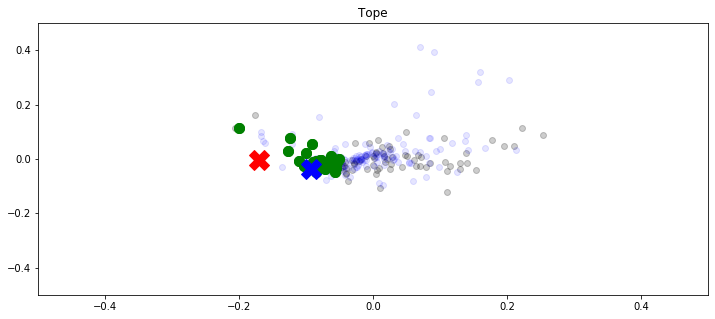

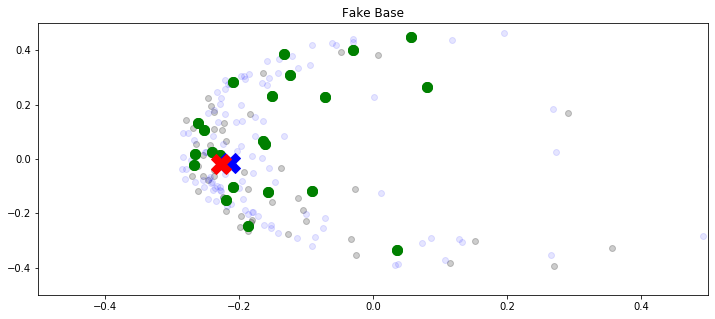

In [21]:
indx= 161
if falta[indx] != 'Base':    
    min_neighbors, min_index = get_neighbors(X_pca_real_part1[indx], X_pca_real_part1, 50)
    dist_tope = calcDistance(X_pca_fake_part1[indx], min_neighbors)
    show_part1(min_neighbors, indx, 'Base')
    min_neighbors = X_pca_real_part2[min_index]
    target_fake = X_pca_fake_part2[indx]
    show_part2(min_neighbors, indx, 'Fake Tope')
else:
    min_neighbors, min_index = get_neighbors(X_pca_real_part2[indx], X_pca_real_part2, 50)
    dist_base = calcDistance(X_pca_fake_part2[indx], min_neighbors)
    show_part2(min_neighbors, indx, 'Tope')
    min_neighbors = X_pca_real_part1[min_index]
    show_part1(min_neighbors, indx, 'Fake Base')
    target_fake = X_pca_fake_part1[indx]
    print(dist_base)
        

In [22]:
# 26

In [23]:
falta_base = []
falta_tope = []
base = []
tope = []
for indx in range(X_pca_real_part1.shape[0]):
    if falta[indx] != 'Base':    
        min_neighbors, min_index = get_neighbors(X_pca_real_part1[indx], 
                                                 X_pca_real_part1, 50)
        dist_base = calcDistance(X_pca_fake_part1[indx], [X_pca_real_part1[indx]])
        #dist_tope = calcDistance(X_pca_fake_part1[indx], min_neighbors)
        #show_part1(min_neighbors, indx, 'Fake Tope {}'.format(dist_tope))
        
        min_neighbors = X_pca_real_part2[min_index]
        #min_neighbors = X_pca_real_part2[indx]
        dist_tope = calcDistance(X_pca_fake_part2[indx], min_neighbors)
        #dist_base = distance.euclidean(X_pca_fake_part2[indx], X_pca_real_part2[indx])
        
        #show_part2(min_neighbors, indx, 'Base {}'.format(dist_base))
        #print('Falta Base:',  dist_base, ' Tope:',dist_tope )
        base.append(dist_base)
        falta_tope.append(dist_tope)
        print('Tope', indx, len(base))
                
    else:
        min_neighbors, min_index = get_neighbors(X_pca_real_part2[indx], 
                                                 X_pca_real_part2, 50)

        dist_tope = calcDistance(X_pca_fake_part2[indx], [X_pca_real_part2[indx]])
        #dist_base = calcDistance(X_pca_fake_part2[indx], min_neighbors)
        #show_part2(min_neighbors, indx, 'Tope {}'.format(dist_base))
        
        min_neighbors = X_pca_real_part1[min_index]
        #min_neighbors = X_pca_real_part1[indx]
        
        dist_base = calcDistance(X_pca_fake_part1[indx], min_neighbors)
        #dist_tope = distance.euclidean(X_pca_fake_part1[indx], X_pca_real_part1[indx])
        #show_part1(min_neighbors, indx, 'Fake Base {}'.format(dist_tope))
        #print('Falta Tope:', dist_tope , ' Base:', dist_base)
        falta_base.append(dist_base)
        tope.append(dist_tope)
        print('Base', indx, len(tope))
    



[0.12375155]
[0.00617958 0.00617958 0.00736889 0.00736889 0.01514492 0.01514492
 0.0170074  0.0170074  0.02444243 0.02444243 0.02569105 0.02569105
 0.02780812 0.02780812 0.0376089  0.0376089  0.04255072 0.04255072
 0.05695357 0.05695357 0.06851977 0.06851977 0.06922033 0.06922033
 0.06952813 0.06952813 0.06999187 0.06999187 0.07322022 0.07322022
 0.0769597  0.0769597  0.07795829 0.07795829 0.08014415 0.08014415
 0.08062001 0.08062001 0.08364359 0.08364359 0.12398198 0.12398198
 0.13724589 0.13724589 0.18486586 0.18486586 0.21180726 0.21180726
 0.2445048  0.2445048 ]
Tope 0 1
[0.09482129]
[0.00883266 0.00883266 0.01282065 0.01282065 0.01299957 0.01299957
 0.01973952 0.01973952 0.02521816 0.02521816 0.02785081 0.02785081
 0.02852481 0.02852481 0.03999751 0.03999751 0.04207439 0.04207439
 0.04801829 0.04801829 0.05361693 0.05361693 0.06008897 0.06008897
 0.07942681 0.07942681 0.08657219 0.08657219 0.09535268 0.09535268
 0.10718711 0.10718711 0.11152299 0.11152299 0.13354789 0.13354789
 0.

In [24]:
indices[44]

108

In [25]:
indx

185

In [26]:
np.array(tope).shape

(93,)

In [27]:
print(np.mean(tope), np.mean(base))
#0.12168202094895514 0.025655312358782677

0.06436602075076445 0.29443004228157155


In [28]:
print(np.mean(falta_tope), '+/-', np.std(falta_tope))
print(np.mean(falta_base), '+/-', np.std(falta_base))
#0.14081911511945747 +/- 0.08872512868947538
#0.028127280416559472 +/- 0.033943648767321075

0.02205074282838219 +/- 0.032372820854973006
0.05054035896547793 +/- 0.05005671276724615


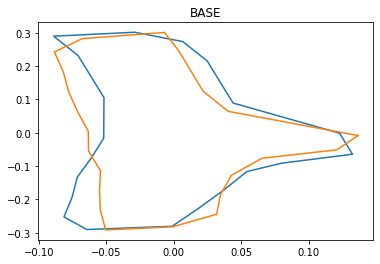

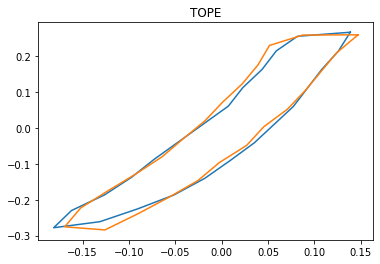

In [29]:
indx = 85
plt.figure()
plt.title('BASE')
plt.plot(fake_part1[indx][:, 0], fake_part1[indx][:, 1])
plt.plot(real_part1[indx][:, 0], real_part1[indx][:, 1])
plt.figure()
plt.title('TOPE')
plt.plot(fake_part2[indx][:, 0], fake_part2[indx][:, 1])
plt.plot(real_part2[indx][:, 0], real_part2[indx][:, 1])

In [30]:
np.save('base_plato_v6c.npy', base)
np.save('tope_plato_v6c.npy', tope)
np.save('falta_plato_tope_v6c.npy', falta_tope)
np.save('falta_plato_base_v6c.npy', falta_base)